In [43]:
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt  
import seaborn as seabornInstance 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics
%matplotlib inline

from sklearn.model_selection import cross_val_score
from sklearn import metrics
from sklearn import svm
from sklearn import datasets
from sklearn.svm import SVR

from sklearn.model_selection import GridSearchCV

from sklearn import preprocessing

from sklearn.metrics import mean_squared_error

from sklearn.metrics import r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.multioutput import MultiOutputRegressor


In [44]:
dataset = pd.read_csv('Final.csv')

dataset = dataset.dropna()




In [45]:
dataset.shape

(1742, 8)

In [46]:
dataset.describe()

,Age,d180,d180N,L*,SST,Alkane,Alkanol,Sediment
count,1742.000000,1742.000000,1742.000000,1742.000000,1742.000000,1742.000000,1742.000000,1742.000000
mean,1319.219288,3.878342,-0.142041,-0.416439,-0.387974,0.217212,0.337544,0.186445
std,980.267195,0.459455,0.921044,0.948658,1.085082,1.001678,1.025913,1.181329
min,0.000000,2.915000,-2.560963,-2.902871,-2.494080,-1.388262,-2.748250,-2.025494
25%,435.250000,3.521250,-0.798378,-1.135268,-1.494532,-0.340511,0.070310,-0.535899
50%,1141.000000,3.838500,-0.062172,-0.244825,0.030251,-0.069019,0.195092,-0.072568
75%,2139.500000,4.205750,0.573802,0.363064,0.603821,0.522277,0.794019,0.406326
max,3455.000000,5.085000,1.789119,1.418183,1.235949,5.710774,6.465403,4.233408


In [47]:
dataset.tail(-100)

,Age,d180,d180N,L*,SST,Alkane,Alkanol,Sediment
100,100,3.807,0.000974,0.315873,-1.754782,1.385903,2.073575,-0.992681
101,101,3.915,-0.215527,0.289787,-1.767089,1.385812,2.083160,-0.988416
102,102,3.856,-0.097253,0.165876,-1.767089,1.385812,2.083160,-0.988416
103,103,3.876,-0.137346,0.138807,-1.767089,1.385812,2.083160,-0.988416
104,104,3.921,-0.227555,0.121669,-1.772266,1.394154,2.083160,-0.985602
105,105,3.849,-0.083221,0.067283,-1.776433,1.400868,2.083160,-0.983336
106,106,4.003,-0.391936,-0.023506,-1.777372,1.404901,2.083160,-0.982016
107,107,4.044,-0.474127,-0.124214,-1.780097,1.416596,2.083160,-0.978187
108,108,4.112,-0.610443,-0.266603,-1.780097,1.416596,2.083160,-0.978187
109,109,4.122,-0.630489,-0.548685,-1.785740,1.440055,2.083160,-0.969670


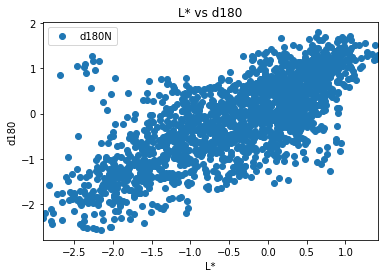

In [48]:
dataset.plot(x='L*', y='d180N', style='o')  
plt.title('L* vs d180')  
plt.xlabel('L*')  
plt.ylabel('d180')  
plt.show()

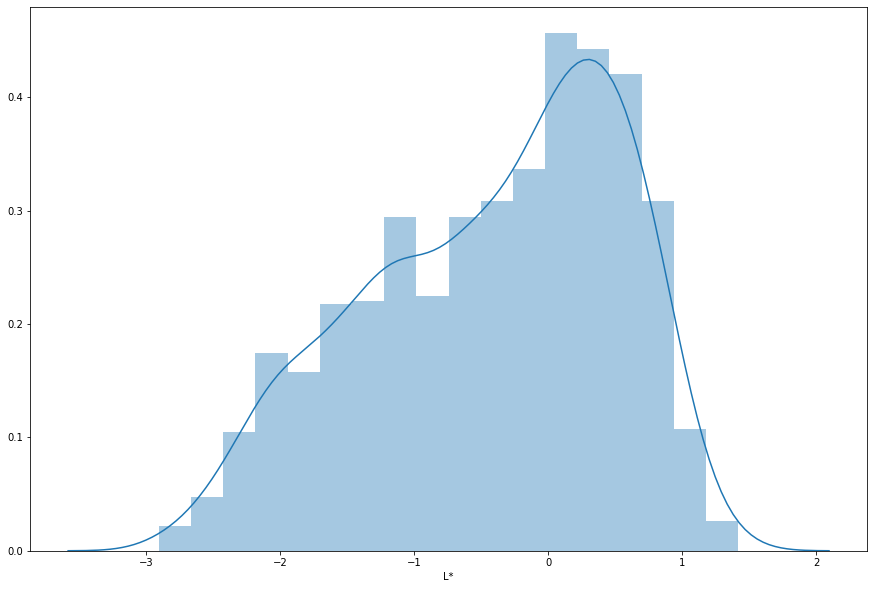

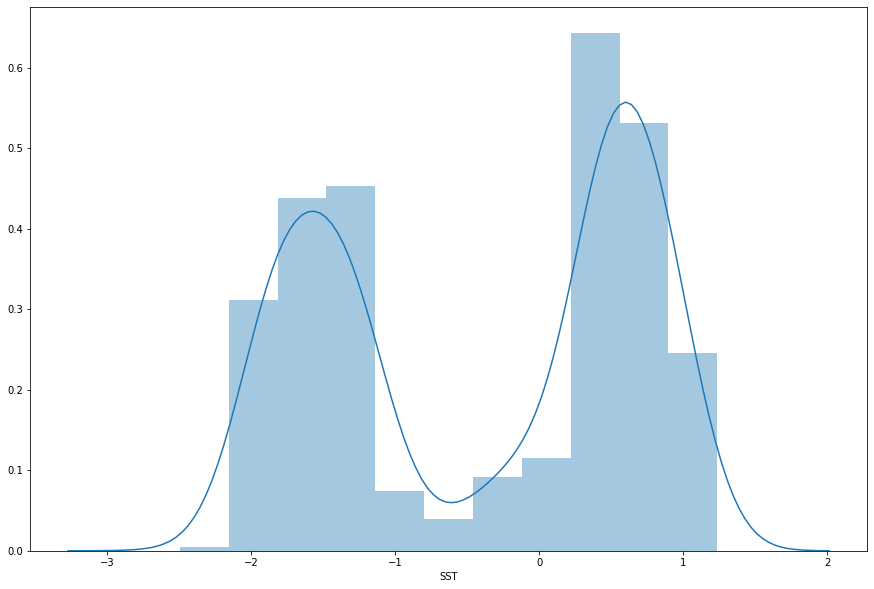

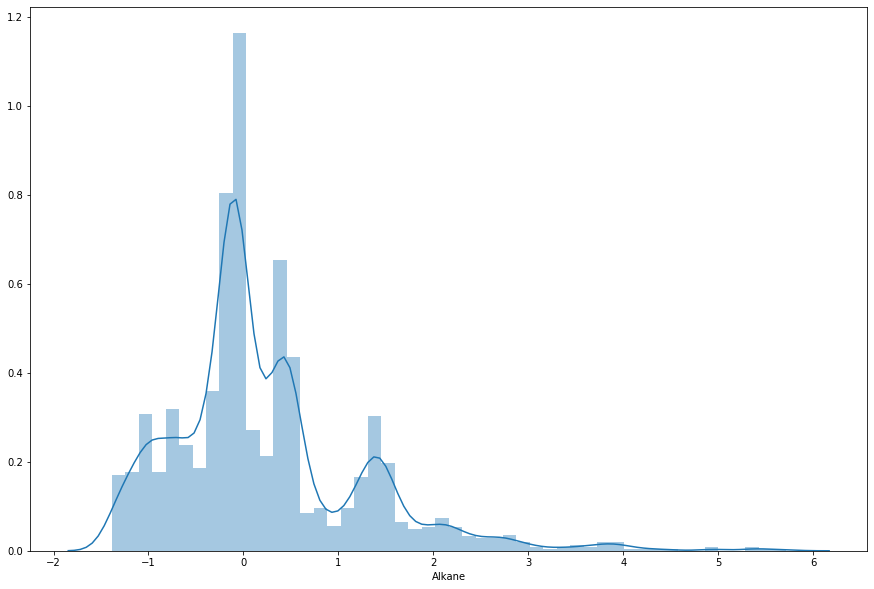

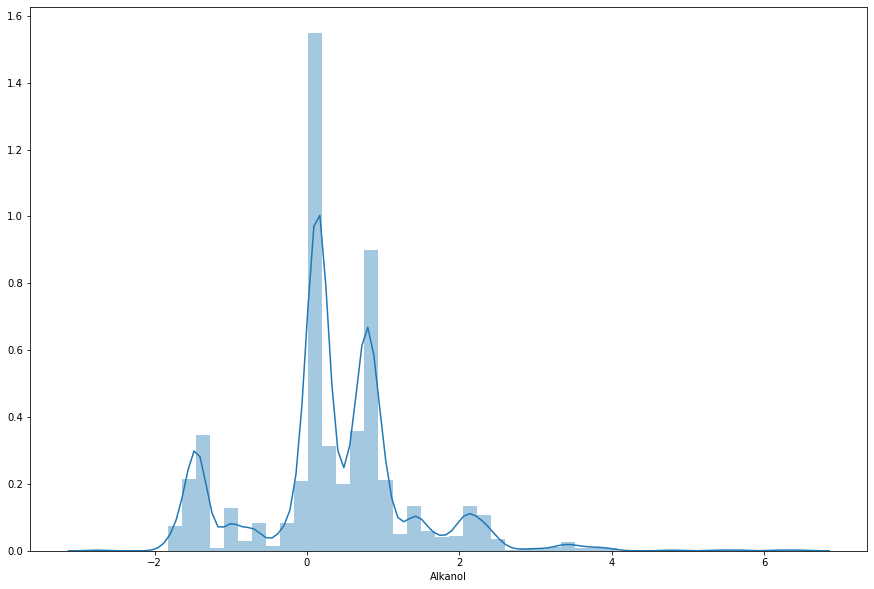

In [49]:
plt.figure(figsize=(15,10))
plt.tight_layout()
seabornInstance.distplot(dataset['L*'])

plt.figure(figsize=(15,10))
plt.tight_layout()
seabornInstance.distplot(dataset['SST'])

plt.figure(figsize=(15,10))
plt.tight_layout()
seabornInstance.distplot(dataset['Alkane'])

plt.figure(figsize=(15,10))
plt.tight_layout()
seabornInstance.distplot(dataset['Alkanol'])


In [50]:
X = dataset['L*'].values.reshape(-1,1)
y = dataset['d180N'].values.reshape(-1,1)

In [51]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [52]:
regressor = LinearRegression()  
regressor.fit(X_train, y_train) #training the algorithm

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [53]:
#To retrieve the intercept:
print(regressor.intercept_)
#For retrieving the slope:
print(regressor.coef_)

[0.1722707]
[[0.73460779]]


In [54]:
y_pred = regressor.predict(X_test)

In [55]:
df = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})

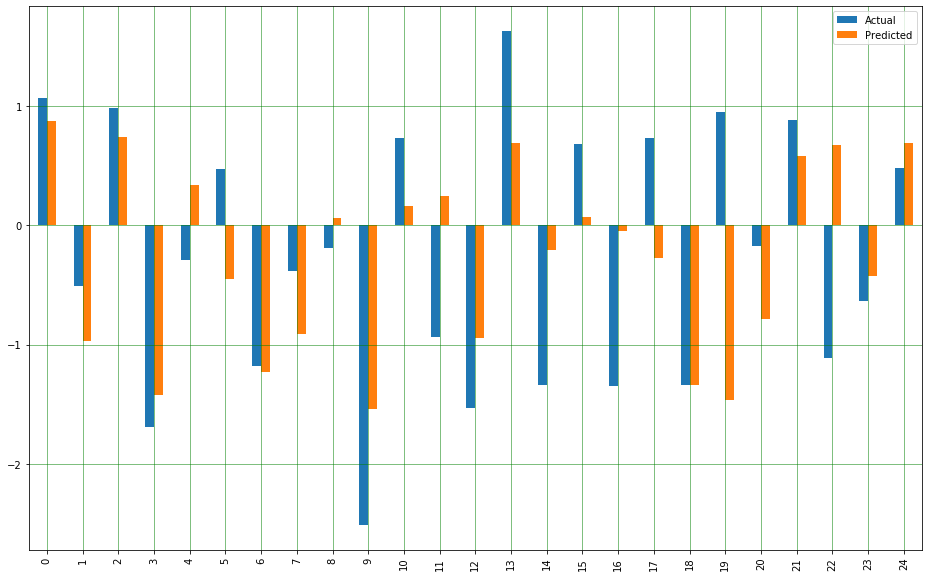

In [56]:
df1 = df.head(25)
df1.plot(kind='bar',figsize=(16,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

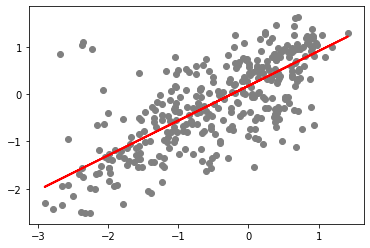

In [57]:
plt.scatter(X_test, y_test,  color='gray')
plt.plot(X_test, y_pred, color='red', linewidth=2)
plt.show()

In [58]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 0.4980773409624781
Mean Squared Error: 0.4315862697301887
Root Mean Squared Error: 0.656952258334035


Ok, not good.  We will try to CV to see if that improves, but all in all the data set is not big enough to make a difference.



Let's try a SVM; some CV; and then move onto multivariate

In [59]:
dataset.shape

(1742, 8)

In [60]:
X_data1 = dataset.drop(columns = ['d180N'])
y_data1 = dataset.drop(columns = ['Age','d180','L*','SST','Alkane','Alkanol','Sediment'])

In [61]:
X_data1_scaled = preprocessing.scale(X_data1)
y_data1 = y_data1.values.reshape(-1,1)
X_data1_scaled.shape

(1742, 7)

In [62]:
X_train, X_test, y_train, y_test = train_test_split(X_data1_scaled, y_data1, test_size=0.4, random_state=0)
X_train.shape, y_train.ravel().shape
X_test.shape, y_test.ravel().shape
clf = SVR(kernel='rbf', C=0.5).fit(X_train, y_train.ravel())
clf.score(X_test, y_test.ravel())          

C:\Users\Brandon\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


0.9872819311573869

In [63]:
def svc_param_selection(X, y):
    Cs = [0.01, 0.1, 1, 10,20,50]
    gammas = [0.01, 0.5, 1]
    kernel = ['rbf','linear','poly']
    param_grid = {'C': Cs, 'gamma' : gammas, 'kernel': kernel}
    grid_search = GridSearchCV(SVR(kernel='rbf'), param_grid)
    #would need to add back in ,cv = nfolds after param_grid
    grid_search.fit(X, y)
    grid_search.best_params_
    return grid_search.best_params_

In [38]:
svc_param_selection(X_train,y_train.ravel())

C:\Users\Brandon\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\Brandon\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


{'C': 1, 'gamma': 0.01, 'kernel': 'linear'}

In [64]:
X_train, X_test, y_train, y_test = train_test_split(X_data1_scaled, y_data1, test_size=0.4, random_state=0)
X_train.shape, y_train.ravel().shape
X_test.shape, y_test.ravel().shape
clf1 = SVR(kernel='linear', C=1,gamma = 0.01).fit(X_train, y_train.ravel())
clf1.score(X_test, y_test.ravel())                    


0.997790002596418

pretty good, but let's continue with other models

In [65]:
from sklearn.model_selection import cross_val_score

clf2 = SVR(kernel='rbf', C=20,gamma = 0.01)
scores = cross_val_score(clf2,X_data1_scaled,y_data1.ravel(), cv = 30)
scores



array([0.95464564, 0.9989837 , 0.99509583, 0.99392036, 0.99567343,
       0.99876219, 0.99725651, 0.99267973, 0.99340834, 0.99461468,
       0.99093208, 0.99708644, 0.99772115, 0.99699745, 0.9953237 ,
       0.9966882 , 0.99470401, 0.99732681, 0.99612021, 0.99533378,
       0.98801571, 0.99449801, 0.99708617, 0.99456849, 0.99723572,
       0.99077774, 0.99114041, 0.97328389, 0.97039415, 0.97792648])

In [76]:
knn = KNeighborsRegressor()
regr = MultiOutputRegressor(knn)

regr.fit(X_train, y_train)
KNN = regr.predict(X_test)
